<a href="https://colab.research.google.com/github/jay-thakur/Concept_of_Overfitting/blob/main/Concept_of_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

To understand the concept of Overfitting using Linear Regression with Polynomial Features.

So let's first understand **What is Regression**?

Have you ever thought of How can we predict price of a house or a car using Machine Learning ? Well, Regression technique is used.

**Regression** is used to predict a continuous value. Some of the commons Regression techniques are - 

1. Simple Linear Regression

2. Multiple Linear Regression

3. Polynomial Linear Regression


Now let's understand **what is Overfitting** briefly.

Let's suppose we have a created a model & we want to check how well our model works on unseen data. Sometimes our model performs poor due to **Overfitting** or **underfitting**. 

When a model gives high accuracy on train dataset but performs poor on unseen dataset, then we call it as Overfitted model. 

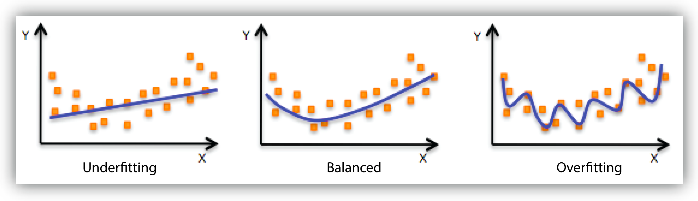


**Underfitting** is when a model performs poor on training dataset. underfitted models are unable to find relationship between input & target.

In this article, we will learn Overfitting Concept with Linear Regression with Polynomial Features.

So let's start.

In [140]:
# Let's load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

# Linear Regression with Polynomial Features

we will create 20 random `uniform distributed` values & then we will use `sin` function to predict. we will work on **[0, 1, 3, 9]** order linear regression



In [141]:
np.random.seed(2)

n_samples = 20

# uniform distribution
X = np.sort(np.random.uniform(0, 1, n_samples))
print(X)

# Sample N from the normal gaussian distribution
# N = np.random.normal(0, 1)
# N = np.random.normal(0, 1, 20)
N = np.random.normal(0, 1, size=20)
print(N)

[0.02592623 0.07964548 0.13457995 0.18443987 0.20464863 0.26682728
 0.29965467 0.33033482 0.4203678  0.43532239 0.4359949  0.49423684
 0.51357812 0.52914209 0.54966248 0.61927097 0.62113383 0.78533515
 0.84656149 0.85397529]
[-0.74787095  0.00902525 -0.87810789 -0.15643417  0.25657045 -0.98877905
 -0.33882197 -0.23618403 -0.63765501 -1.18761229 -1.42121723 -0.1534952
 -0.26905696  2.23136679 -2.43476758  0.1127265   0.37044454  1.35963386
  0.50185721 -0.8442137 ]


In [142]:
# define a sign function
def true_func(X):
  return np.sin(2*np.pi*X)

In [143]:
# function to calculate y
y = true_func(X) + N * 0.1
print(y)

[ 0.08739272  0.480703    0.66055228  0.90070779  0.98533246  0.895538
  0.91784257  0.85167285  0.41596177  0.2765268   0.24928142  0.02085359
 -0.11211609  0.04105296 -0.55047614 -0.66992813 -0.65267847 -0.83949185
 -0.77134048 -0.87850614]


Now we have our dataset X, y, let's draw it.

[]

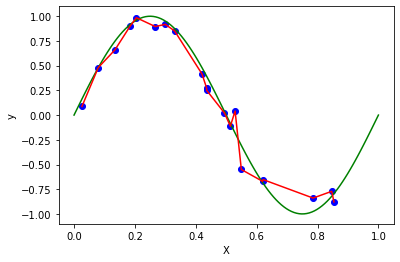

In [144]:
# lets draw our graph
X_plot = np.linspace(0, 1, 120).reshape((-1,1))
plt.plot(X_plot, true_func(X_plot), color='green')
plt.scatter(X, y, color='blue')
plt.plot(X, y, color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

Let's divide our dataset into **train** & **test** dataset using **sklearn**

In [ ]:
# let's divide the dataset into train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train = X_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

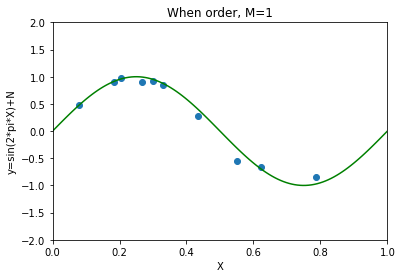

In [146]:
# plt.scatter(X, y)
plt.scatter(X_test, y_test)
plt.plot(X_plot, true_func(X_plot), color='green')
plt.title('When order, M='+str(1))
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

In [147]:
# a function to plot the graph
def show_plot(degree, X_train, y_train, X_test, preds, plot_preds):
  # plt.scatter(X_train, y_train)
  # plt.scatter(X_test, sort(y_test)
  plt.plot(X_plot, true_func(X_plot), color='green')
  # plt.plot(X_test, preds, color='m')
  plt.scatter(X_test, preds, color='m')
  plt.scatter(X_test, y_test)
  plt.plot(X_plot, plot_preds)
  plt.title('When order, M='+degree)
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+N')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.show()


Now lets define our model & plot graph for degrees `0, 1, 3, 9`

10
120


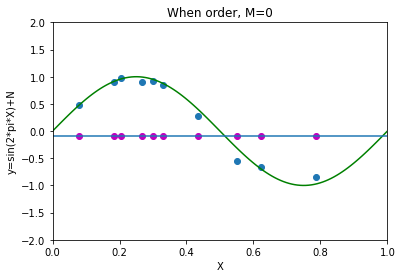

10
120


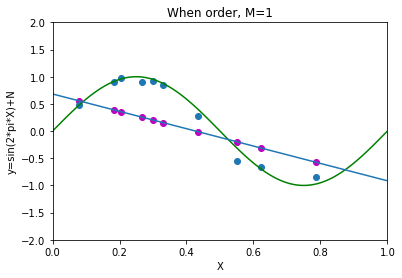

10
120


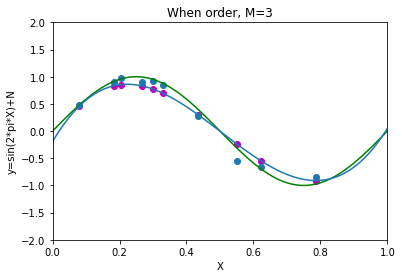

10
120


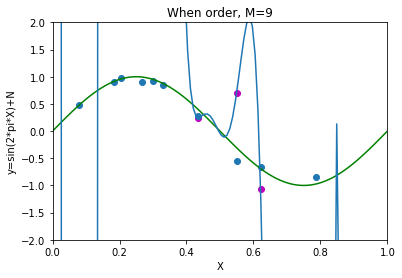

In [148]:
degrees = [0, 1, 3, 9]
coefs_list = {}
for i in range(len(degrees)):
  d = str(degrees[i])

  polynomial_features = PolynomialFeatures(degree=degrees[i])
  X_train_transformed = polynomial_features.fit_transform(X_train)
  polynomial_features.fit(X_train_transformed, y_train)

  lr_model = LinearRegression()
  lr_model.fit(X_train_transformed, y_train)

  M = 'M'+ d
  # print(M)
  coefs_list[M] = lr_model.coef_

  X_test_transformed = polynomial_features.fit_transform(X_test)
  preds = lr_model.predict(X_test_transformed)
  print(len(preds))

  X_plot_transformed = polynomial_features.fit_transform(X_plot)
  plot_preds = lr_model.predict(X_plot_transformed)
  print(len(plot_preds))
  
  # X_test_transformed = polynomial_features.fit_transform(X_test)
  # preds = lr_model.predict(X_test_transformed)

  # z = sorted(zip(X_test, preds))
  # X_test, preds = zip(*z)

  show_plot(d, X_train, y_train, X_test, preds, plot_preds)

Now let's display weights in a tabular form

## Displaying weights in Table 

In [149]:
# prepare weights to display in table

M0_list = ["", "", "", "", "", "", "", "", ""]
M1_list = ["", "", "", "", "", "", "", ""]
M3_list = ["", "", "", "", "", ""]
M9_list = []

def append_list(coefs_list, degree, M, M_list):
  for i in range(0, degree+1):
    coefs_list[M] = coefs_list[M].flatten()
    M_list.insert(i, str(round(coefs_list[M][i], 4)))

append_list(coefs_list, 0, 'M0', M0_list)
append_list(coefs_list, 1, 'M1', M1_list)
append_list(coefs_list, 3, 'M3', M3_list)
append_list(coefs_list, 9, 'M9', M9_list)

weights = {'M = 0': M0_list, 'M = 1': M1_list, 'M = 3': M3_list, 'M = 9': M9_list}
indexes = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']

weights_df = pd.DataFrame(weights, index=indexes)
weights_df.style.format("{:.2f}")
weights_df

,M = 0,M = 1,M = 3,M = 9
w0,0.0,0.0,0.0,0.0
w1,,-1.597,10.4413,-130577.8404
w2,,,-30.0341,2075364.3123
w3,,,19.8358,-15304185.0334
w4,,,,63447341.2649
w5,,,,-160220923.5812
w6,,,,252321721.2738
w7,,,,-242324986.0789
w8,,,,129936061.4238
w9,,,,-29818900.7714


we have trained out model. It's estimate our model. Let's calcualte the train & test error

## Train Error & Test Error

In [150]:
# Train & Test error
train_error = []
test_error = []

for i in range(0, 9):
  # polynomial_features = PolynomialFeatures(degree=i)
  # X_train_poly = polynomial_features.fit_transform(X_train)
  # polynomial_features.fit(X_train_poly, y_train)

  # lr_model = LinearRegression()
  # lr_model.fit(X_train_poly, y_train)

  pipeline = make_pipeline(PolynomialFeatures(degree=i),LinearRegression())
  pipeline.fit(X_train, y_train)

  train_preds = pipeline.predict(X_train)
  train_loss = np.sqrt(mean_squared_error(y_train, train_preds))
  train_error.append(train_loss)

  test_preds = pipeline.predict(X_test)
  test_loss = np.sqrt(mean_squared_error(y_test, test_preds))
  test_error.append(test_loss)

print(train_error)
print(test_error)

[0.4917132754606717, 0.2857710741933349, 0.21544719293288572, 0.08353358029162618, 0.0761970762631266, 0.07500413857543299, 0.06742970363342113, 0.03840016864244734, 0.035305527885493716]
[0.8129999993362734, 0.49670883894032103, 0.4654043681024886, 0.13772717505513818, 0.14869805635933298, 0.19006251671939353, 0.36582485263190034, 2.694069514911612, 3.519373451265294]


In [151]:
# plt.subplot(1,2,1)
# plt.plot(train_error, label="Train error", marker='o', color='blue')
# plt.subplot(1,2,2)
# plt.plot(test_error, label="Test error", marker='o', color='red')
# plt.show()

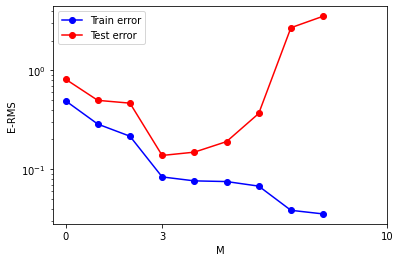

In [152]:
plt.plot(train_error, label="Train error", marker='o', color='blue')
plt.plot(test_error, label="Test error", marker='o', color='red')
plt.yscale('log')
plt.xticks([0, 10, 3])
plt.xlabel("M")
plt.ylabel("E-RMS")
plt.legend(loc="best")
plt.show()

we can see the train & test error through this graph. as we can see, test error is huge, it means our model is overfitted.

So **How to prevent this Overfitting ?**

Overfitting can be prevented by 
1. Increasing Dataset
2. Regularisation 

### Now generate 100 more data and fit 9th order model and draw fit

### Increasing Dataset

Let's add some more data & see how does our model perform?

In [153]:
# uniform distribution
new_samples = 120

X_new = np.sort(np.random.uniform(0, 1, new_samples))
# print(X_new)

# Sample N from the normal gaussian distribution 
N_new = np.random.normal(scale=0.1 , size=new_samples )
# print(N_new)

y_new = true_func(X_new) + N_new * 0.1
# print(y_new)
X_new = X_new[:, np.newaxis]

Let's plot our new dataset

[]

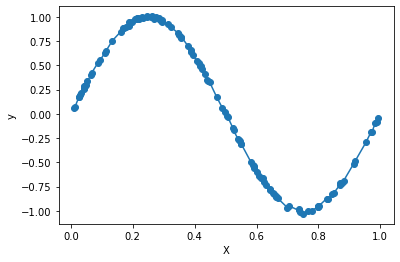

In [154]:
# plot the dataset
plt.scatter(X_new, y_new)
plt.plot(X_new, y_new)
plt.xlabel("X")
plt.ylabel("y")
plt.plot()

In [155]:
# divide the new dataset into train & test
X_train_new, y_train_new, X_test_new, y_test_new = train_test_split(X_new, y_new, test_size=0.5)

# X_train_new = X_train_new[:, np.newaxis]
# y_train_new = y_train_new[:, np.newaxis]

# X_test_new = X_test_new[:, np.newaxis]
# y_test_new = y_test_new[:, np.newaxis]

Let's fit & predict for `degree 9`

ValueError: ignored

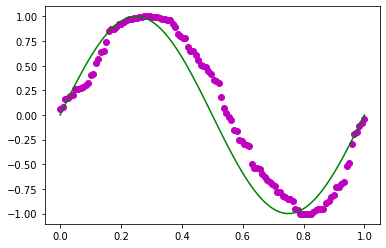

In [156]:
d = 9
pipeline = make_pipeline(PolynomialFeatures(d), LinearRegression())
pipeline.fit(X_new, y_new)
preds_new = pipeline.predict(X_new)

X_plot_preds_new = pipeline.predict(X_plot)

show_plot(str(d), X_new, y_new, X_plot, preds_new, X_plot_preds_new)

### Now we will regularize using the sum of weights.

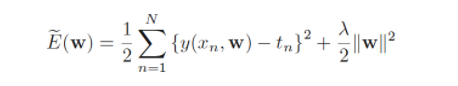

### Regularisation

the next approach to minimize loss is using **Regularization** technique. 

In simple words, 
**Regularization** is used to prevent overfitting.

There are many types of regularization. we will use **L2 Regularisation** also called as **Ridge Regularisation**.

[Ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated. It has uses in fields including econometrics, chemistry, and engineering

### Apply Regularisation & Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

In [ ]:
lambda_values = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]

train_error_ridge = []
test_error_ridge = []

for lambda_value in lambda_values:
  # fit the model
  pipeline = make_pipeline(PolynomialFeatures(degree=9),Ridge(alpha=lambda_value))
  pipeline.fit(X_train_new, y_train_new)

  # predict on train & test data
  y_train_preds_ridge = pipeline.predict(X_train_new)
  y_test_preds_ridge = pipeline.predict(X_test_new[:, np.newaxis])

  # calculate the train loss
  train_loss_ridge = np.sqrt(mean_squared_error(y_train_new, y_train_preds_ridge))
  train_error_ridge.append(train_loss_ridge)

  # calculate the test loss
  test_loss_ridge = np.sqrt(mean_squared_error(y_test_new, y_test_preds_ridge))
  test_error_ridge.append(test_loss_ridge)

  # plot the graph
  plt.scatter(np.sort(X_new), np.sort(y_new), s=10, color='blue')
  plt.plot(np.sort(X_plot), np.sort(true_func(X_plot)), color='green')
  plt.plot(np.sort(X_test_new), np.sort(y_test_preds_ridge), color='red')
  # plt.xlim((0, 1))
  # plt.ylim((-2, 2))
  plt.xlabel('X')
  plt.ylabel('y=sin(2*pi*X)+N')
  plt.title("When lambda = "+str(lambda_value))
  plt.show()

In [ ]:
train_error_ridge

In [ ]:
test_error_ridge

### Now draw test  and train error according to lamda = 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

In [ ]:
plt.plot(train_error_ridge, label="Train error using L2", color='blue', marker='o')
plt.plot(test_error_ridge, label="Test error using L2", color='red', marker='o')

plt.xticks([])
plt.yticks([])

plt.xlabel("Lambda Values")
plt.ylabel("E-RMS")

plt.legend(loc="best")

plt.show()

### Best Model (According to test performance)

as from the `Train error using L2` & `Test error using L2` graph, for each lambda values, our train error is almost the same but test error differs. we can see for lambda = 1, there is some test error whereas for lambda = 1/100000, test error is huge. so according to this graph `lambda = 1/100` is a best model.

### My Contribution

I went thorugh various tutorials, understood code & implemented this on my own. added data points & experimented with multiple degrees as well as captured train & test error. Also plotted the graphs.

### Challanges

The first challange was to fit model with many degrees, used `pipeline` module from `sklearn` to fix this. 

Next was to prevent overfitting, `Increased data` & used `L2 Regularisation` to fix this.

### Experiments & Finding

**Experiment** tried with many (1/1000000, 1/10000000) lambdas values to see wheather train & test error increase or decrease.



In [ ]:
lambda_values = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000, 1/1000000, 1/10000000]

train_error_ridge = []
test_error_ridge = []

for lambda_value in lambda_values:
  # fit the model
  pipeline = make_pipeline(PolynomialFeatures(degree=9),Ridge(alpha=lambda_value))
  pipeline.fit(X_train_new, y_train_new)

  # predict on train & test data
  y_train_preds_ridge = pipeline.predict(X_train_new)
  y_test_preds_ridge = pipeline.predict(X_test_new[:, np.newaxis])

  # calculate the train loss
  train_loss_ridge = np.sqrt(mean_squared_error(y_train_new, y_train_preds_ridge))
  train_error_ridge.append(train_loss_ridge)

  # calculate the test loss
  test_loss_ridge = np.sqrt(mean_squared_error(y_test_new, y_test_preds_ridge))
  test_error_ridge.append(test_loss_ridge)

plt.plot(train_error_ridge, label="Train error using L2", color='blue', marker='o')
plt.plot(test_error_ridge, label="Test error using L2", color='red', marker='o')

plt.xticks([])
plt.yticks([])

plt.xlabel("Lambda Values")
plt.ylabel("E-RMS")
plt.legend(loc="best")
plt.show()

**Finding** - as we can see, for more lambda values `test error` is getting increased.

### What's Next

**Ensemble Technique**

### My Blog

https://jaythakur.medium.com/concept-of-overfitting-987b531bebda

### My Git Repo

https://github.com/jay-thakur/Concept_of_Overfitting/blob/main/Concept_of_Overfitting.ipynb


# References

https://medium.datadriveninvestor.com/regression-in-machine-learning-296caae933ec


https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

https://datascience.foundation/sciencewhitepaper/underfitting-and-overfitting-in-machine-learning

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

https://medium.com/@minions.k/ridge-regression-l1-regularization-method-31b6bc03cbf

https://medium.com/all-about-ml/lasso-and-ridge-regularization-a0df473386d5

https://en.wikipedia.org/wiki/Ridge_regression

